# PROJECT : Loan Application Status Prediction

### STEP-1) Importing Required Libraries
Firstly we just imported the necessary packages like pandas, numpy, seaborn etc. so that we can carry the necessary operations further.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

### STEP-2) Load/Read the Data from the File/Dataset


In [2]:
df = pd.read_csv('Loan.csv')

In [3]:
# Bottom 5 rows of dataset
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
# Top 30 rows of dataset
df.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


### STEP-3) Data Cleaning and Filling missing values


In [5]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
total=df.isnull().sum()

In [7]:
total

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
df.Gender = df.Gender.fillna('Male')

Do the Same with rest columns which have 'NaN' on empty places

In [10]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
df.Married = df.Married.fillna('Yes')

In [12]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
df.Dependents = df.Dependents.fillna('0')

In [14]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
df.Self_Employed = df.Self_Employed.fillna('No')

In case of many different different numerical values we will fill the empty places in column with mean(average) value of rest entries. As we will be doing in LoanAmount case as bellow :   

In [16]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [17]:
Mean = df.LoanAmount.mean()
print(Mean)
df.LoanAmount = df.LoanAmount.fillna(Mean)

146.41216216216216


In [18]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [19]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(360.0)

In [20]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [21]:
df.Credit_History = df.Credit_History.fillna(1.0)

Now going back and checking again the total no. of missing values (OR empty places) for each column

### STEP-4) Converting Categorical variable into Numeric
We will convert Categorical variable into Numeric by using Label Encoding.

In [22]:
from sklearn.preprocessing import LabelEncoder
# making a list of categorial variables
Cate_var=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

# converting process
le=LabelEncoder()
for i in Cate_var:
    df[i]=le.fit_transform(df[i])
# Here fit_transform() ,Fit label encoder and return encoded labels. 

In [23]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,LP001014,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [24]:
df.tail(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1
613,LP002990,0,0,0,0,1,4583,0.0,133.0,360.0,0.0,1,0


### STEP-5) Feature Selection
Here, we need to divide given columns into two
types of variables dependent(or target variable)
and independent variable(or feature variables).
For this purpose we will usee 'iloc' indexer.

The iloc indexer for Pandas Dataframe is used for
integer-location based indexing / selection by
position.

In [25]:
# For X : any no. of rows and column 1 to 11 (last one not encluded)
X = df.iloc[:,1:12]
# For y : any no. of rows and column no. 12
y = df.iloc[:,12]

In [26]:
X.head(4)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2


In [27]:
y.tail()

609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, dtype: int32

### STEP-6) Splitting Data
To understand model performance, dividing the
dataset into a training set and a test set is a good
strategy. Let's split the dataset by using function
train_test_split().We need to pass 4 parameters
features, target, test_size, and random_sate in function.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

> Here the Dataset is broken into two parts in a ratio of 80:20. It means 80% data will be used for model training and 20% for model testing 

In [29]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
90,1,1,0,0,0,2958,2900.0,131.0,360.0,1.0,1
533,1,0,1,0,0,11250,0.0,196.0,360.0,1.0,1
452,1,1,0,0,0,3948,1733.0,149.0,360.0,0.0,0
355,0,0,0,0,0,3813,0.0,116.0,180.0,1.0,2
266,1,1,2,0,0,4708,1387.0,150.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
277,1,1,0,0,0,3103,1300.0,80.0,360.0,1.0,2
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1
359,1,1,3,0,0,5167,3167.0,200.0,360.0,1.0,1
192,1,1,0,1,0,6033,0.0,160.0,360.0,1.0,2


In [30]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,1,0,0,0,1,7085,0.0,84.0,360.0,1.0,1
52,0,0,0,0,0,4230,0.0,112.0,360.0,1.0,1
536,1,1,0,0,0,6133,3906.0,324.0,360.0,1.0,2
469,1,1,0,0,0,4333,2451.0,110.0,360.0,1.0,2
55,1,1,2,0,0,2708,1167.0,97.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
337,1,1,2,0,1,2500,4600.0,176.0,360.0,1.0,0
376,1,1,3,0,0,8750,4996.0,130.0,360.0,1.0,0
278,1,1,0,0,0,14583,0.0,436.0,360.0,1.0,1
466,1,1,3,1,0,2947,1664.0,70.0,180.0,0.0,2


In [31]:
y_train

90     1
533    0
452    0
355    1
266    1
      ..
277    1
9      0
359    1
192    0
559    1
Name: Loan_Status, Length: 491, dtype: int32

In [32]:
y_test

454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 123, dtype: int32

### STEP-7) Modeling  ' AND'  STEP-8) Evaluation

Now we can use appropriate model for the given problem which gives comparatively answer with high Accuracy than other model. Here we will check Accuracy for all models under classification (Decision-tree, Logistic-regression,Random Forest). 

## Algorithm-1) Building Decision Tree Model :

In [33]:
from sklearn.tree import DecisionTreeClassifier
DT_model= DecisionTreeClassifier()
DT_model.fit(X_train,y_train)
y_pred= DT_model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [34]:
y_test

454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 123, dtype: int32

#### DT_model Evaluation:

 Accuracy of the DT_model :-

In [35]:
# Accuracy can be computed by comparing actual test set values and predicted values.
from sklearn import metrics
print("Using DT_model, Accuracy is :",metrics.accuracy_score(y_test,y_pred))

Using DT_model, Accuracy is : 0.6747967479674797


DT_model Evaluation using Confusion Matrix :-

In [36]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)

[[19 14]
 [26 64]]


> Visualizing Confusion Matrix of DT-model using Heatmap :-

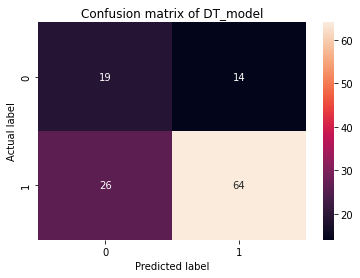

In [37]:
import seaborn as sb
from matplotlib import pyplot as plt

sb.heatmap(cnf_matrix, annot=True)
plt.title('Confusion matrix of DT_model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


..

## Algorithm-2) Building Logistic Regression Model :

In [38]:
from sklearn.linear_model import LogisticRegression
LR_model= LogisticRegression()
LR_model.fit(X_train,y_train)
y_pred=LR_model.predict(X_test)
y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [39]:
y_test

454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 123, dtype: int32

#### LR_model Evaluation:

 Accuracy of the LR_model :-

In [40]:
# Accuracy can be computed by comparing actual test set values and predicted values.
from sklearn import metrics
print("Using LR_model, Accuracy is :",metrics.accuracy_score(y_test,y_pred))

Using LR_model, Accuracy is : 0.8373983739837398


 LR_model Evaluation using Confusion Matrix :-

In [41]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)

[[15 18]
 [ 2 88]]


 Visualizing Confusion Matrix of LR-model using Heatmap :-

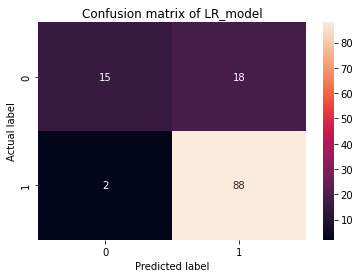

In [42]:
import seaborn as sb
from matplotlib import pyplot as plt

sb.heatmap(cnf_matrix, annot=True)
plt.title('Confusion matrix of LR_model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Algorithm-3) Building Random Forest Model :

In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
#prediction on test dataset
y_pred = classifier.predict(X_test)

In [44]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

Random Forest model Evaluation:

Accuracy of the Random Forest model :-

In [45]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 0.7886178861788617


Random Forest model Evaluation using Confusion Matrix :-

In [46]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)

[[15 18]
 [ 8 82]]


Visualizing Confusion Matrix of Random Forest model using Heatmap :-

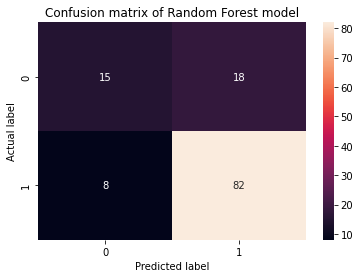

In [47]:
import seaborn as sb
from matplotlib import pyplot as plt

sb.heatmap(cnf_matrix, annot=True)
plt.title('Confusion matrix of Random Forest model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


##### Thus we can see that comparetively with others , Logistic Regression Model gives the most Accurate answers, So we will use this model for future predictions. 

Now, Let's predict whether the loan will get approved or not for a person(John) who is applying for the loan with the following details:


Gender : Male
Married: Yes
Dependents: 1
Education: Graduate
Self_Employed: No
ApplicantIncome: 8000
CoapplicantIncome: 2000
LoanAmount (in thousand): 130
Loan_Amount_Term(Term of loan in months): 24
Credit_History: 0.0
Property_Area (Urban/ Semi Urban/ Rural): Urban

Convert the categorical variable value into numeric
form.
Gender : Male (1)
Married: Yes (1)
Dependents: 1
Education: Graduate (0)
Self_Employed: No (0)
ApplicantIncome: 8000
CoapplicantIncome: 2000
LoanAmount (in thousand): 130
Loan_Amount_Term(Term of loan in months): 24
Credit_History: 0.0
Property_Area (Urban/ Semi Urban/ Rural): Urban (2)

In [48]:
loanstatus=LR_model.predict([[1,1,1,0,0,8000,2000,130,24,0.0,2]])
print(loanstatus)

[1]
